In [76]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
warnings.filterwarnings('ignore')

In [77]:
column_names = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('C:/Users/nishant/movie_recommendation_system/ml-100k/ml-100k/u.data',sep='\t',names=column_names)

In [78]:
df.sample(7)

,user_id,item_id,rating,timestamp
44913,472,373,4,875983129
15486,374,28,5,880395698
36841,316,172,1,880854197
81451,843,50,3,879444670
94117,869,1014,4,884493279
70841,907,497,5,880160204
92851,533,298,4,882195203


In [79]:
df.shape

(100000, 4)

In [80]:
df['user_id'].nunique()

943

In [81]:
movie_title = pd.read_csv('C:/Users/nishant/movie_recommendation_system/ml-100k/ml-100k/u.item',sep='|',header=None,encoding='latin-1')

In [82]:
movie_title = movie_title[[0,1]]

In [83]:
movie_title.columns=['item_id','title']

In [84]:
movie_title

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [85]:
df = pd.merge(df,movie_title,on='item_id')

In [86]:
df.shape

(100000, 5)

# Exploratory Data Analysis

In [87]:
df.groupby('title').mean()['rating']

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [88]:
df.groupby('title').count()['rating']

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [89]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [90]:
ratings['num_of_rating']  = pd.DataFrame(df.groupby('title').count()['rating'])

In [91]:
ratings.sort_values(by='rating',ascending=False)

,rating,num_of_rating
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


In [92]:
ratings.sort_values(by='num_of_rating',ascending=False)

,rating,num_of_rating
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


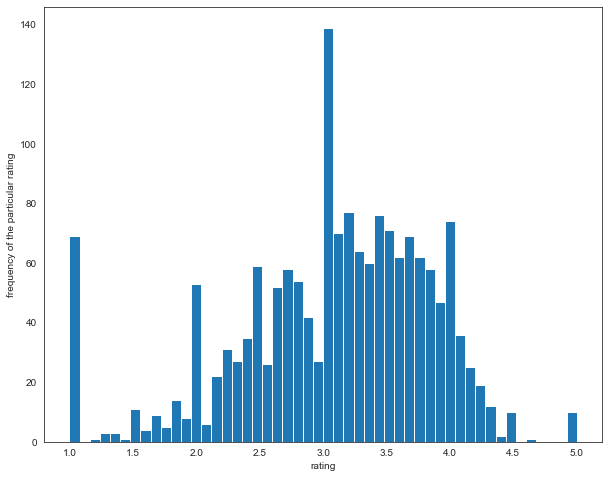

In [93]:
plt.figure(figsize=(10,8))
plt.hist(ratings['rating'],bins=50)
plt.xlabel('rating')
plt.ylabel('frequency of the particular rating')
plt.show()

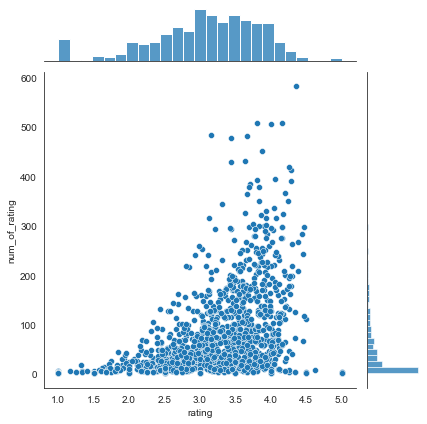

In [94]:
sns.jointplot(x='rating',y='num_of_rating',data=ratings)

This plot depicts that the movie with highest ratings have been watched by fewer people whereas popular movies cannot reach the 5 rating

# Recommendation System

In [95]:
df.pivot_table(index='user_id',columns='title',values='rating')

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [97]:
movie_ratings = moviemat['2001: A Space Odyssey (1968)']

In [98]:
similar_movies = moviemat.corrwith(movie_ratings)

In [99]:
similar_movies = pd.DataFrame(similar_movies,columns=['coorelation'])

In [100]:
similar_movies = similar_movies.join(ratings['num_of_rating'])

In [101]:
similar_movies.dropna(inplace=True)

In [102]:
similar_movies = similar_movies.sort_values(by='coorelation',ascending=False)

In [107]:
similar_movies[similar_movies['num_of_rating']>100]

,coorelation,num_of_rating
title,,
2001: A Space Odyssey (1968),1.000000,259
True Romance (1993),0.459189,104
Natural Born Killers (1994),0.442248,128
Being There (1979),0.425009,116
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),0.392916,194
...,...,...
Air Force One (1997),-0.282994,431
One Fine Day (1996),-0.306766,112
Jungle2Jungle (1997),-0.408455,132


## Prediction

In [124]:
def prediction(name):
    '''
    This function works as a recommendation function and gives the 
    movies more similar to movies which are watched by more than 100 people
    '''
    
    movie_ratings = moviemat[name]
    similar_movies = moviemat.corrwith(movie_ratings)
    similar_movies = pd.DataFrame(similar_movies,columns=['coorelation'])
    similar_movies.dropna(inplace=True)
    
    similar_movies = similar_movies.join(ratings['num_of_rating'])
    
    prediction = similar_movies[similar_movies['num_of_rating']>100].sort_values('coorelation',ascending=False)
    
    return prediction

In [125]:
predict = prediction('Air Force One (1997)')

In [126]:
predict.head()

,coorelation,num_of_rating
title,,
Air Force One (1997),1.000000,431
"Hunt for Red October, The (1990)",0.554383,227
"Firm, The (1993)",0.526743,151
Murder at 1600 (1997),0.514906,218
Eraser (1996),0.500606,206
